In [70]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MultiLabelBinarizer


In [53]:
analysis_df = pd.read_csv("../data/test/all/metadata/all_audio_features.csv")
# Convert string-based col to list-based col where applicable
analysis_df["genre(s)"] = analysis_df["genre(s)"].str.split('//')
analysis_df["artist_names"] = analysis_df["artist_names"].str.split('//')


def unnest(df, col, reset_index=False):
    import pandas as pd
    col_flat = pd.DataFrame([[i, x] 
                       for i, y in df[col].apply(list).iteritems() 
                           for x in y], columns=['I', col])
    col_flat = col_flat.set_index('I')
    df = df.drop(col, 1)
    df = df.merge(col_flat, left_index=True, right_index=True)
    if reset_index:
        df = df.reset_index(drop=True)
    return df


analysis_df = unnest(analysis_df, 'genre(s)')

numerical_feats = ['danceability','energy','loudness','key','mode',
                   'speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo', 'duration_ms']

analysis_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.529   0.722    1    -4.815     0       0.0814      0.213000   
1             0.533   0.838    0    -3.722     1       0.0319      0.103000   
2             0.749   0.850    0    -4.346     1       0.0468      0.031900   
3             0.619   0.462    4    -9.154     1       0.0402      0.854000   
4             0.629   0.575    6    -5.763     0       0.0354      0.235000   
...             ...     ...  ...       ...   ...          ...           ...   
23893         0.757   0.976    7    -4.610     0       0.0974      0.007500   
23894         0.670   0.970   11    -5.240     0       0.0569      0.001730   
23895         0.862   0.897    2    -5.444     1       0.0365      0.066400   
23896         0.779   0.640    7    -8.415     1       0.1590      0.000155   
23897         0.813   0.631   11    -6.759     0       0.0488      0.001210   

       instrumentalness  liveness  valence    tempo                      id  \
0              0.000000    0.1020    0.666   79.951  14xRAc1zbSZZzKaYgkwqdY   
1              0.000000    0.3940    0.451   75.013  7rLvsAO1yb7ElxPhkz60qh   
2              0.000048    0.0678    0.672  145.983  5EzitieoPnjyKHAq0gfRMa   
3              0.000004    0.0932    0.131  123.945  1RMUSljuiZKUNaf6xskK9n   
4              0.000000    0.0935    0.239  136.053  5pesNiBKAx8JNwK2mQ2HEc   
...                 ...       ...      ...      ...                     ...   
23893          0.169000    0.0394    0.922  123.015  0TR69tw5aybYHbSC1w4xy5   
23894          0.000065    0.1310    0.687  124.989  0PWd4sByvfGrVfADPEJAIs   
23895          0.005480    0.2630    0.603  123.999  4YzJxZBPeudi2QsJiVLVCa   
23896          0.000770    0.1010    0.498   99.019  4TsmezEQVSZNNPv5RJ65Ov   
23897          0.653000    0.1030    0.573  125.026  1kRuoDtxruTlC7fMRONMUz   

                                            analysis_url  duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/14xR...       212132   
1      https://api.spotify.com/v1/audio-analysis/7rLv...       196549   
2      https://api.spotify.com/v1/audio-analysis/5Ezi...       190423   
3      https://api.spotify.com/v1/audio-analysis/1RMU...       193931   
4      https://api.spotify.com/v1/audio-analysis/5pes...       218090   
...                                                  ...          ...   
23893  https://api.spotify.com/v1/audio-analysis/0TR6...       179461   
23894  https://api.spotify.com/v1/audio-analysis/0PWd...       215520   
23895  https://api.spotify.com/v1/audio-analysis/4YzJ...       210879   
23896  https://api.spotify.com/v1/audio-analysis/4Tsm...       246960   
23897  https://api.spotify.com/v1/audio-analysis/1kRu...       172080   

       time_signature                                         artist_ids  \
0                   4                             3cjEqqelV9zb4BYE3qDQ4O   
1                   4  0UEP2XBR9aC5NBKcAKnBIq//4ufh0WuMZh6y4Dmdnklvdl...   
2                   4                             3cjEqqelV9zb4BYE3qDQ4O   
3                   4                             4ufh0WuMZh6y4Dmdnklvdl   
4                   4                             3cjEqqelV9zb4BYE3qDQ4O   
...               ...                                                ...   
23893               4     5fMUXHkw8R8eOP2RNVYEZX//7zm3aSdmGiOkTt0aZFSO8R   
23894               4     2E1NFr5AeEGUJkLUUsWCAO//51ElR96M6ruMMALjuOK6nH   
23895               4     6M2wZ9GZgrQXHCFfjv46we//205i7E8fNVfojowcQSfK9m   
23896               4                             5pKCCKE2ajJHZ9KAiaK11H   
23897               4                             19VDJ9IKyBSUMDJxLsasP6   

                   artist_names                               name   genre(s)  
0                         [EXO]                            PLAYBOY       kpop  
1      [CHEN, BAEKHYUN, XIUMIN]                            For You       kpop  
2                         [EXO]                          Ko Ko Bop       kpop  

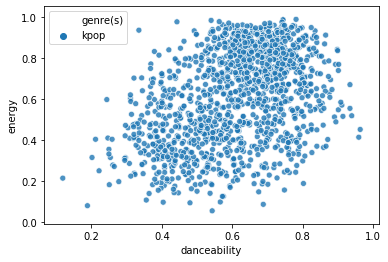

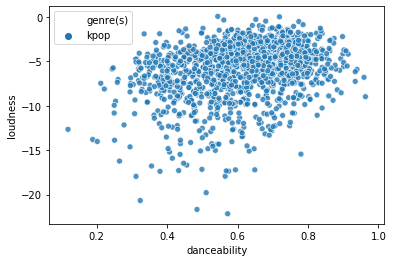

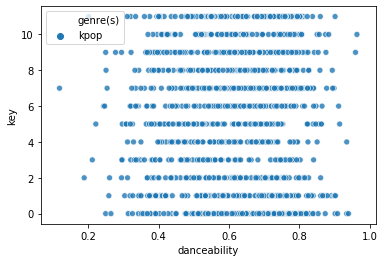

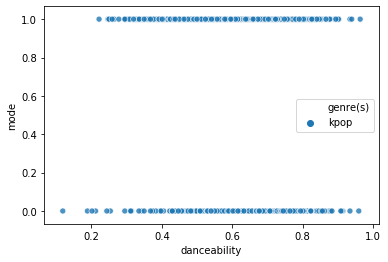

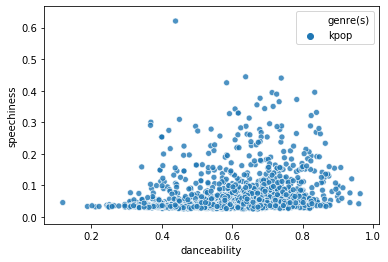

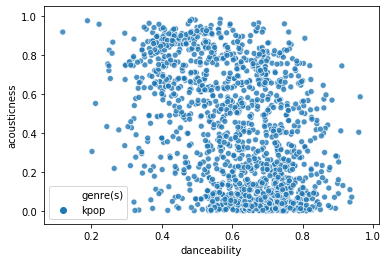

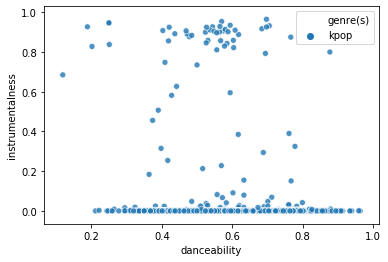

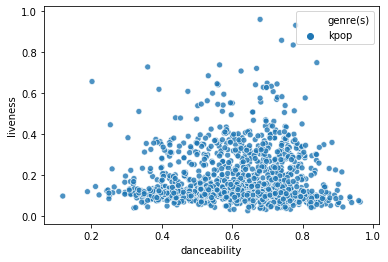

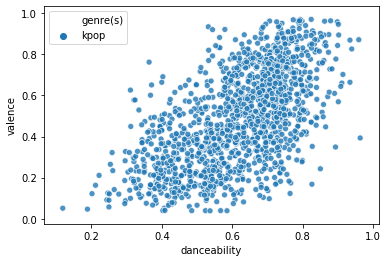

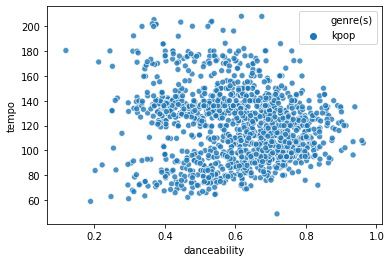

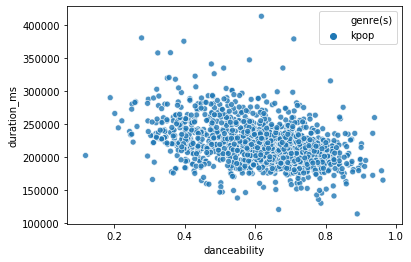

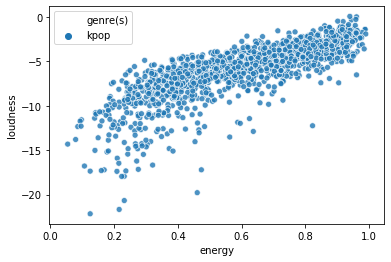

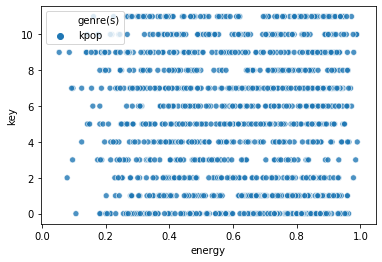

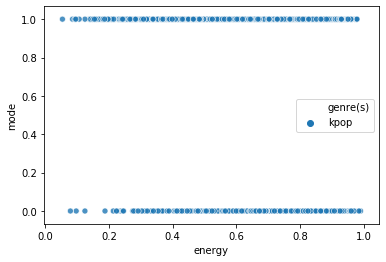

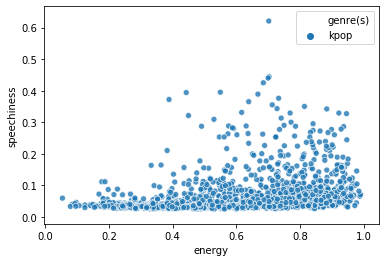

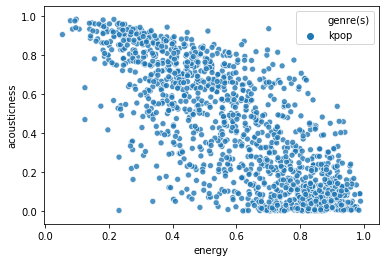

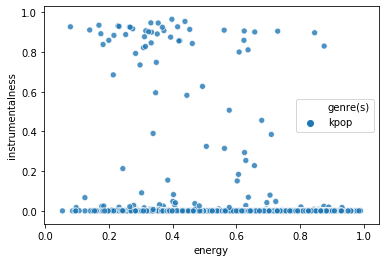

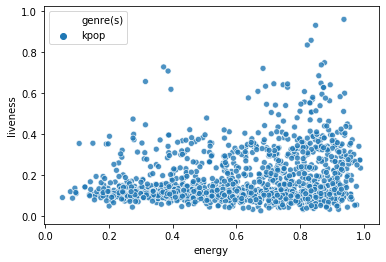

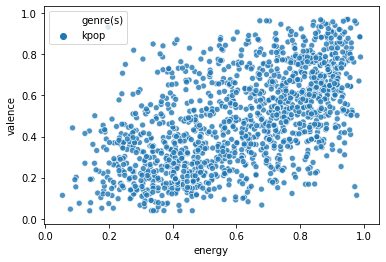

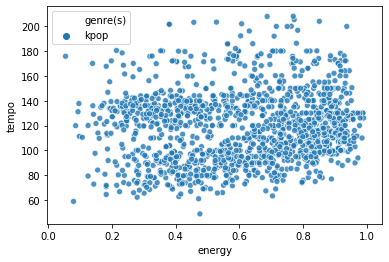

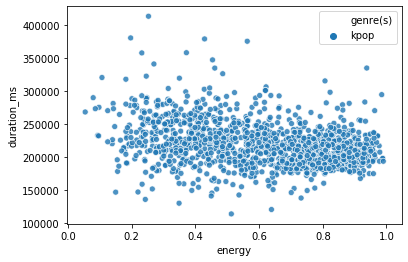

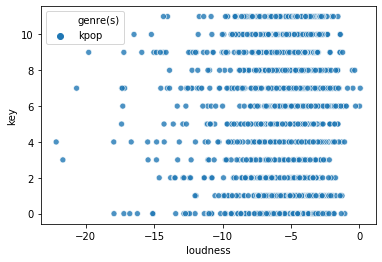

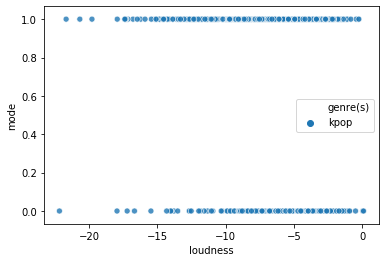

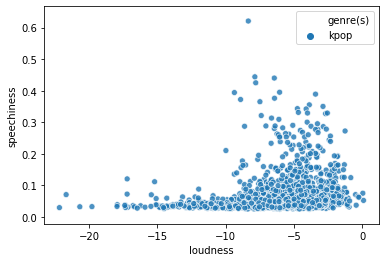

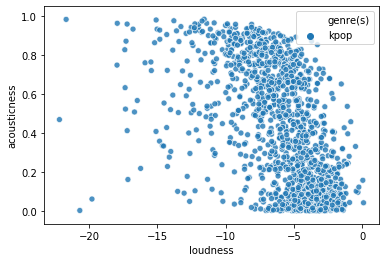

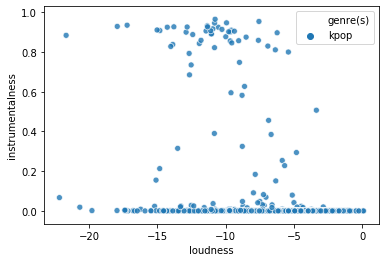

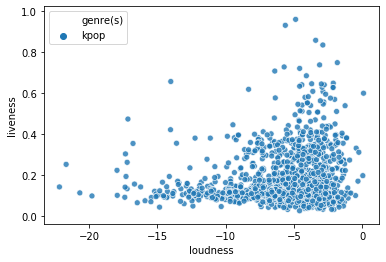

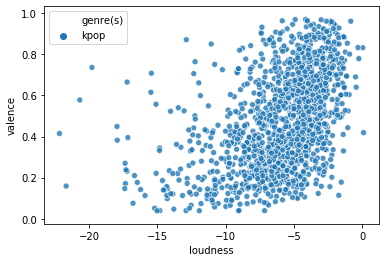

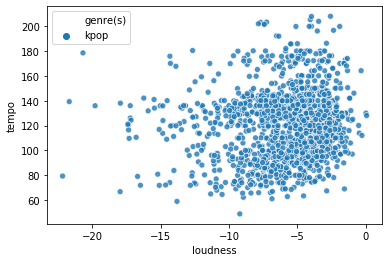

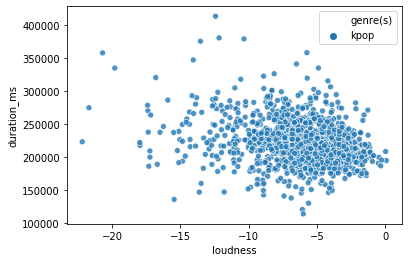

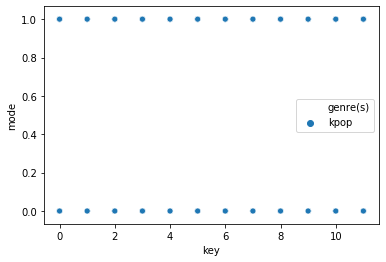

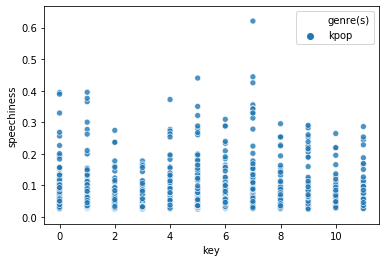

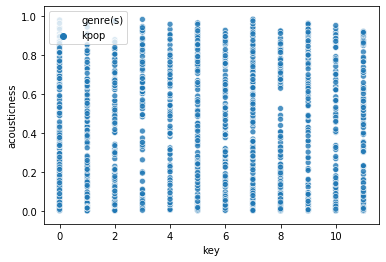

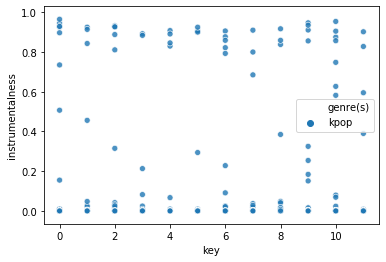

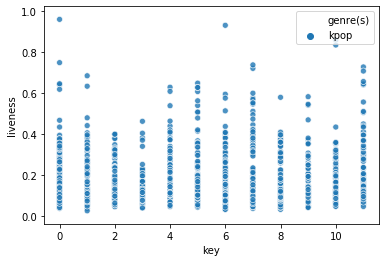

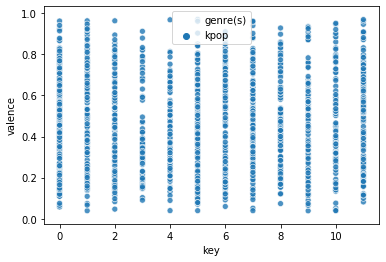

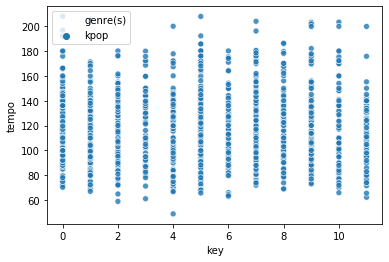

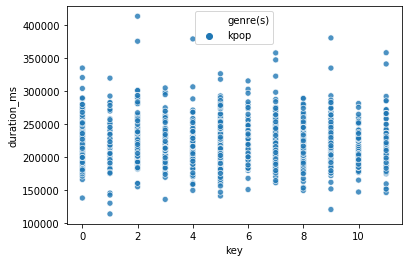

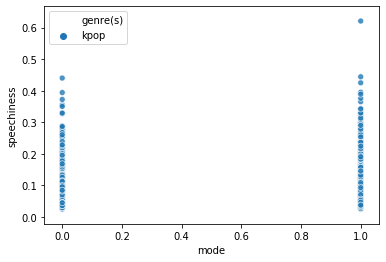

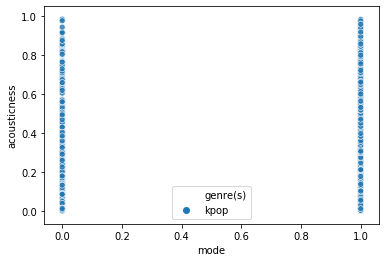

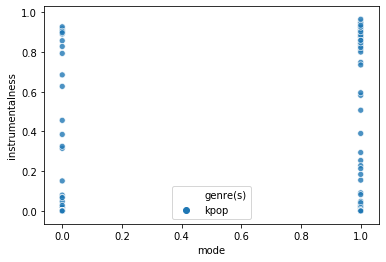

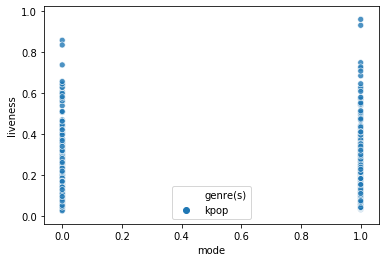

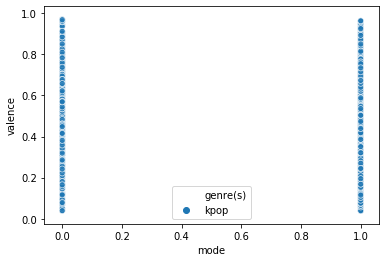

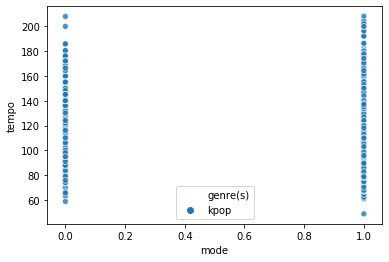

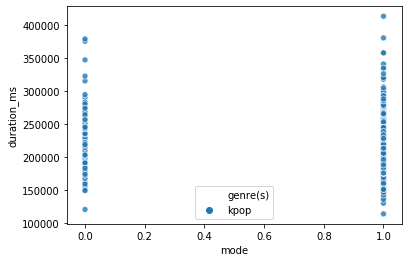

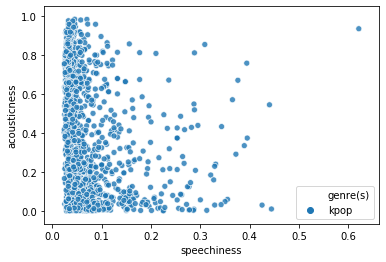

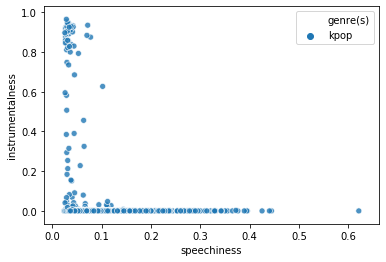

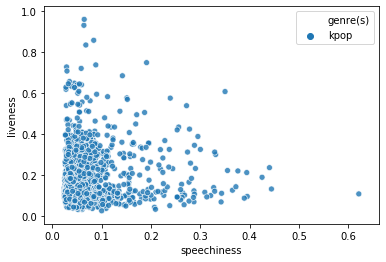

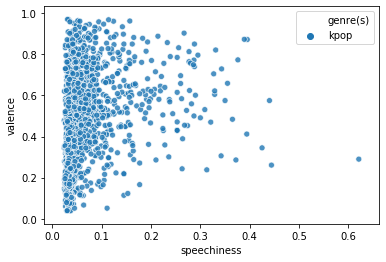

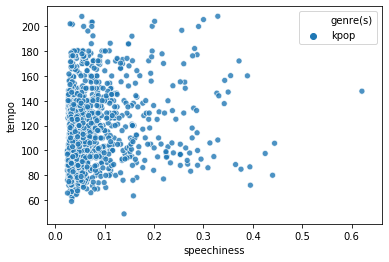

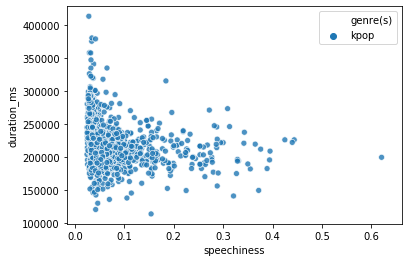

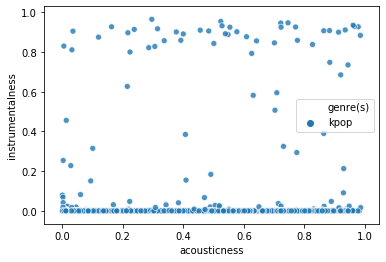

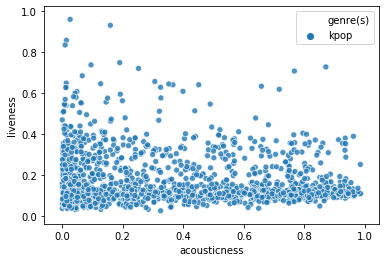

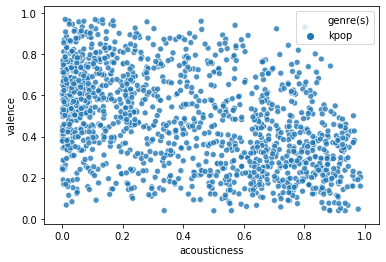

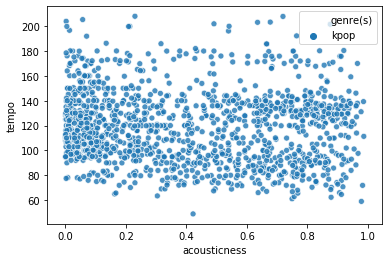

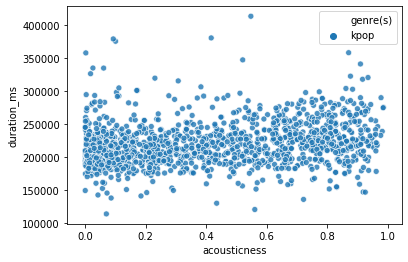

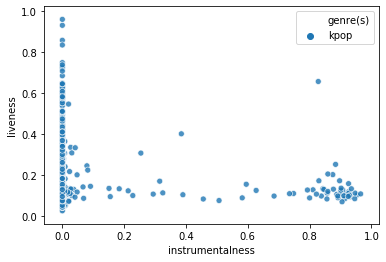

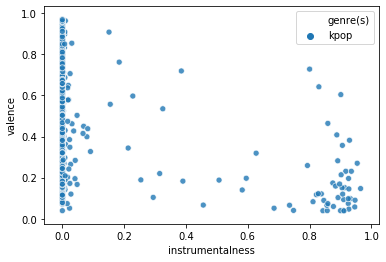

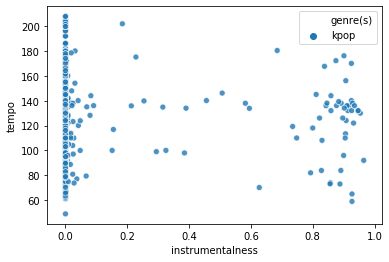

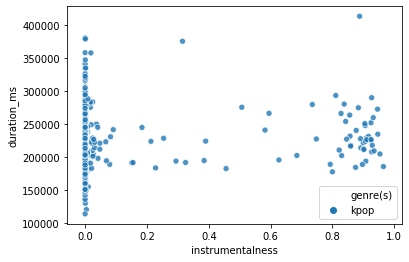

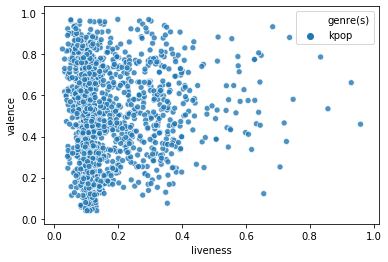

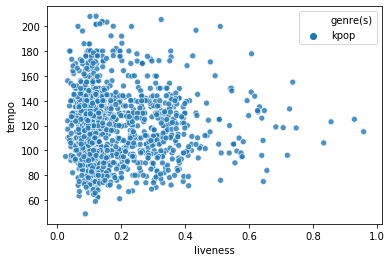

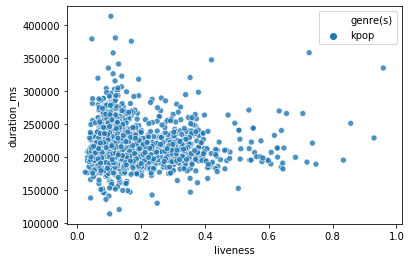

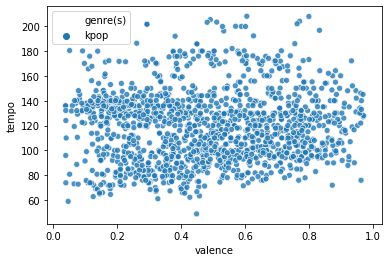

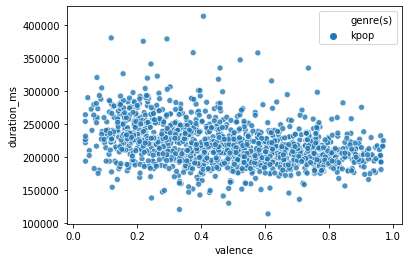

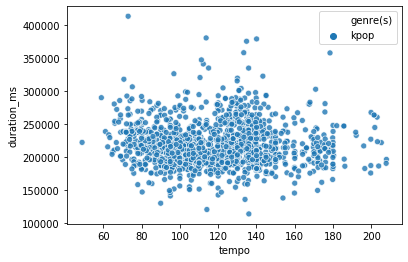

In [59]:
kpop = analysis_df[analysis_df['genre(s)'] == 'kpop']
list_of_pairs = [(numerical_feats[f1], numerical_feats[f2]) for f1 in range(len(numerical_feats)) for f2 in range(f1+1,len(numerical_feats))]
for i in list_of_pairs:
    #analysis_df.plot.scatter(x=i[0], y=i[1], title=i[0] + ' vs ' + i[1],  hue='genre')
    sns.scatterplot(x=i[0], y=i[1], hue='genre(s)', data=kpop, alpha=0.8) 
    plt.show()

In [50]:
analysis_df = analysis_df.sample(frac=0.1, replace=False, random_state=1)

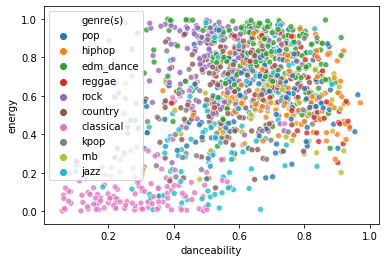

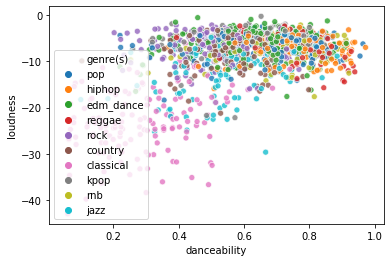

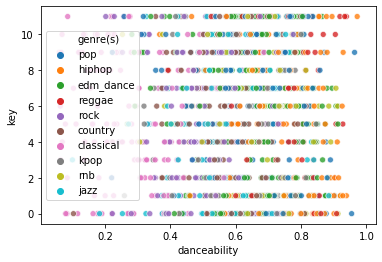

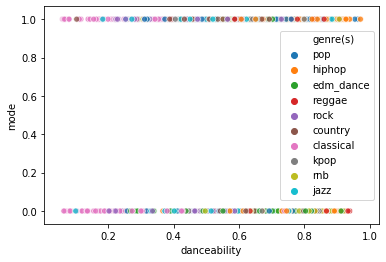

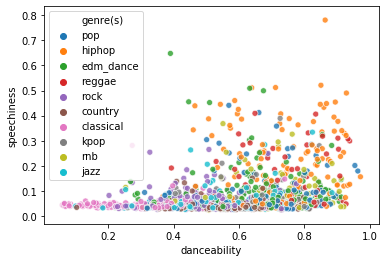

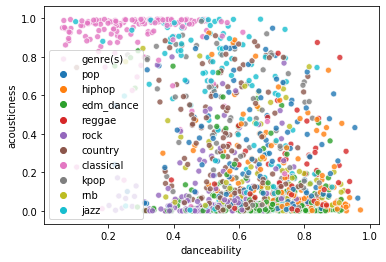

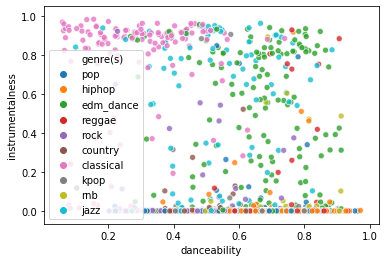

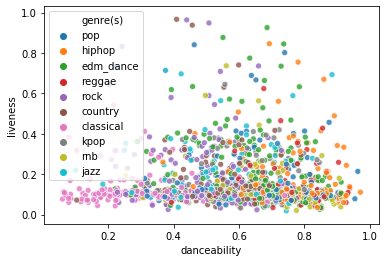

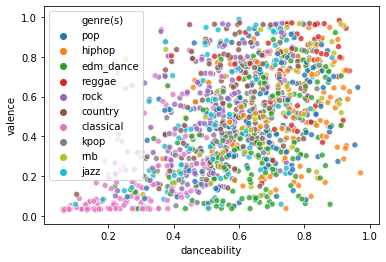

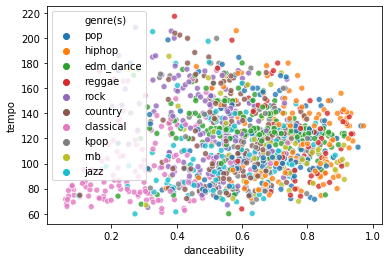

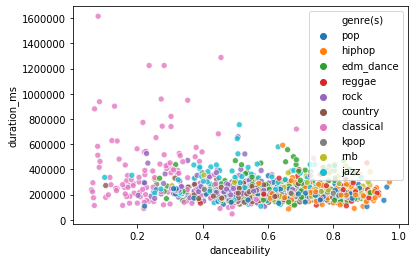

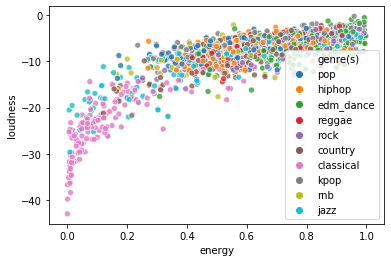

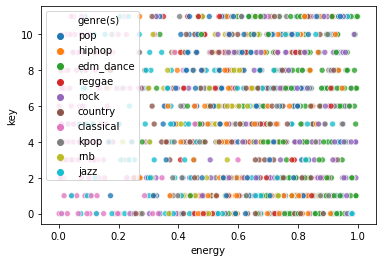

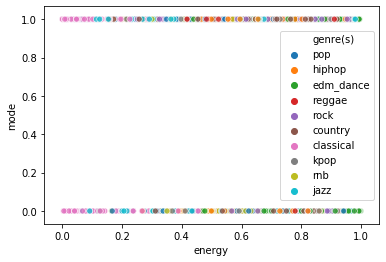

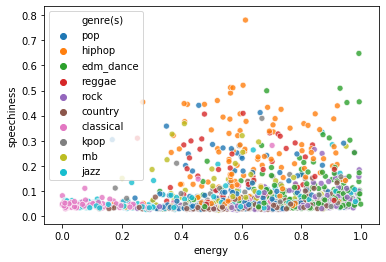

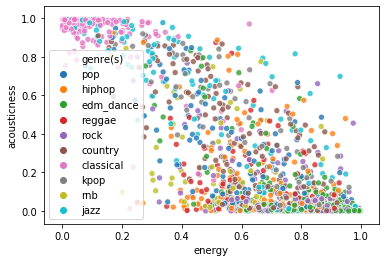

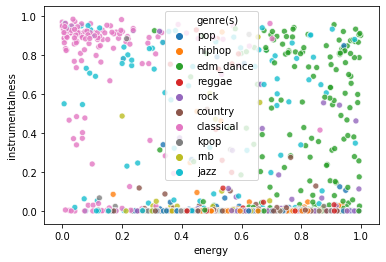

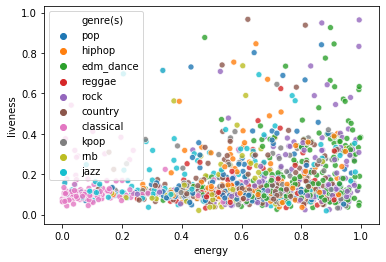

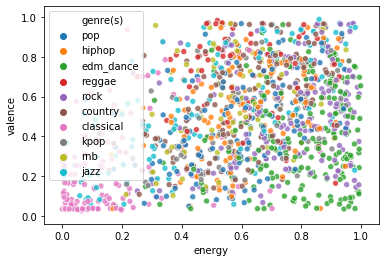

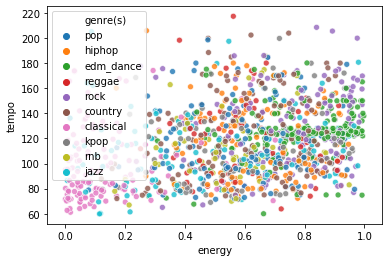

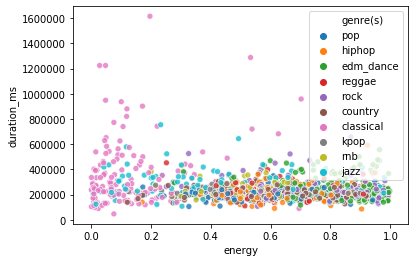

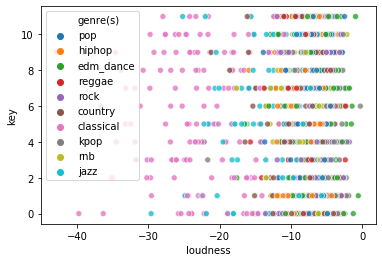

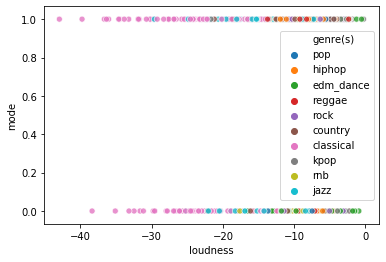

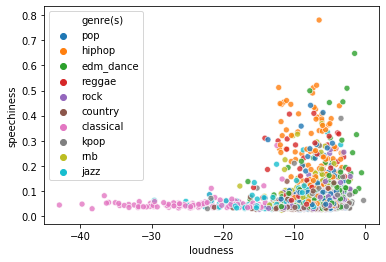

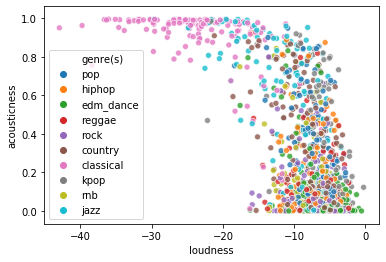

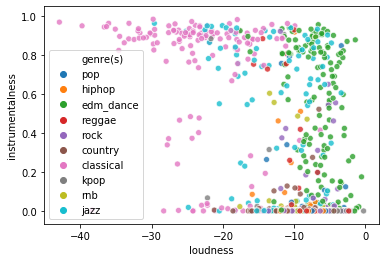

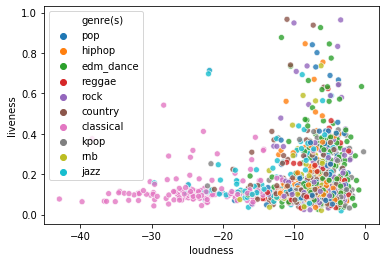

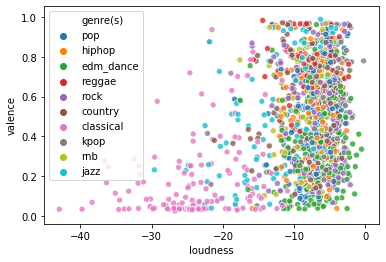

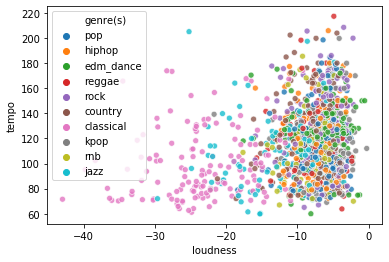

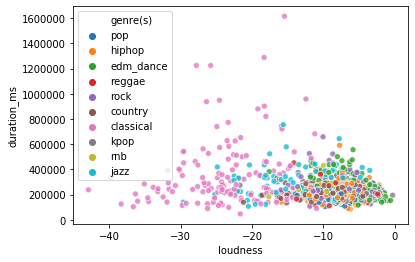

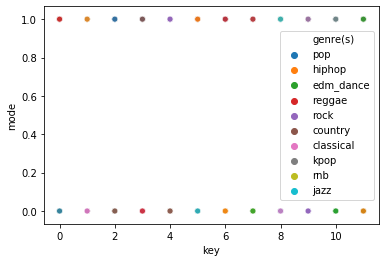

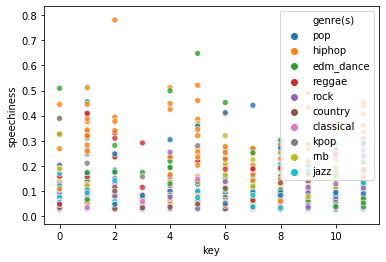

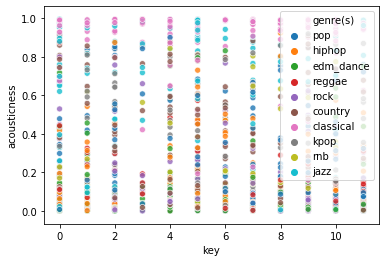

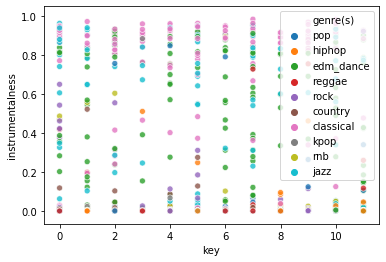

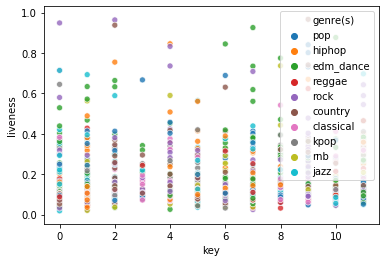

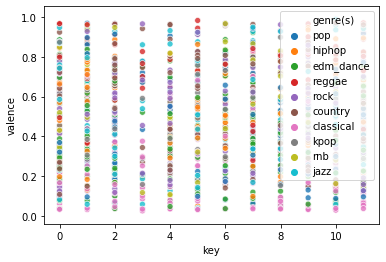

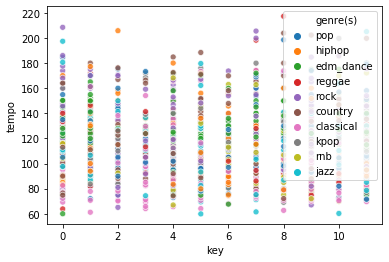

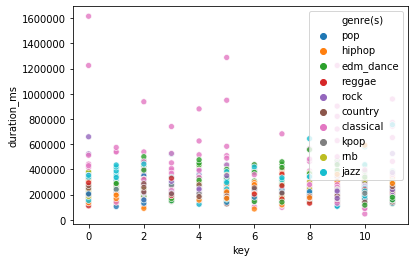

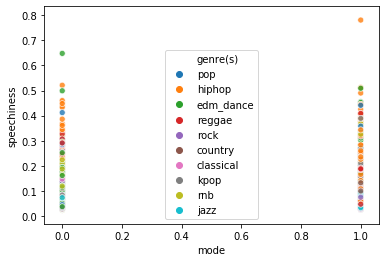

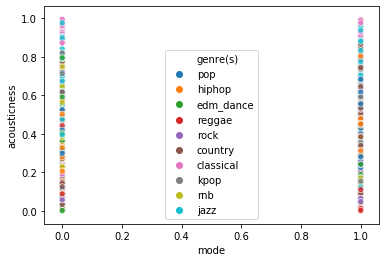

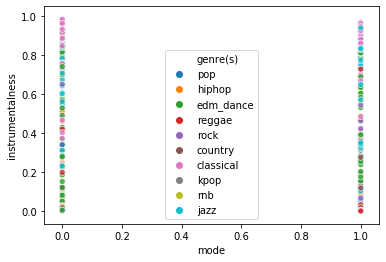

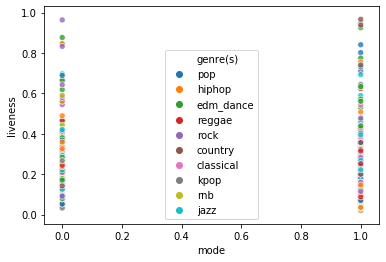

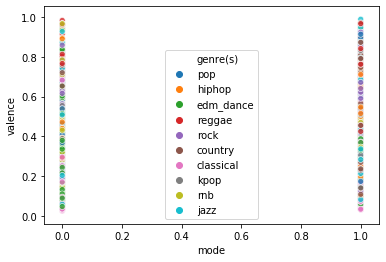

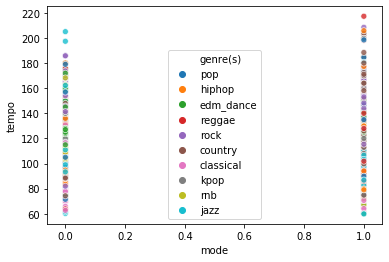

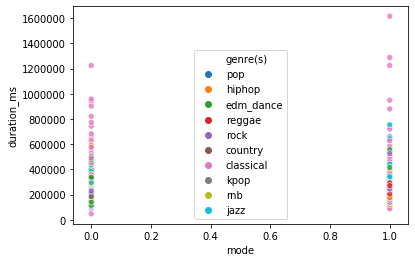

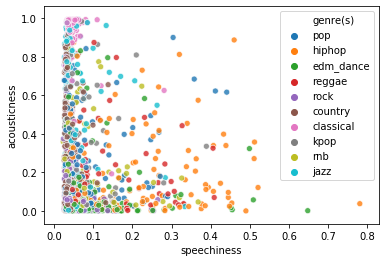

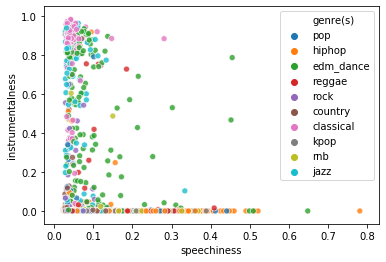

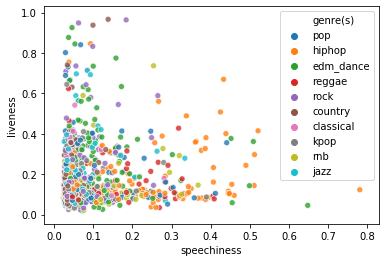

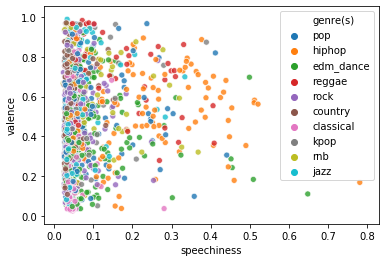

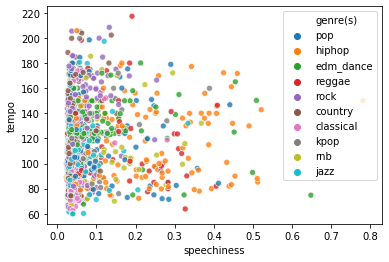

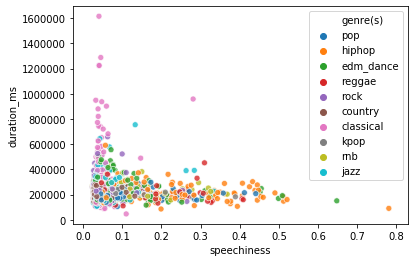

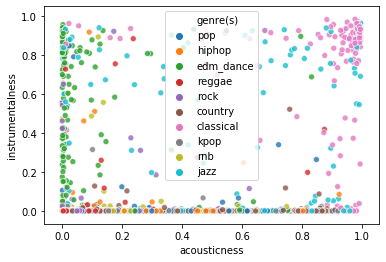

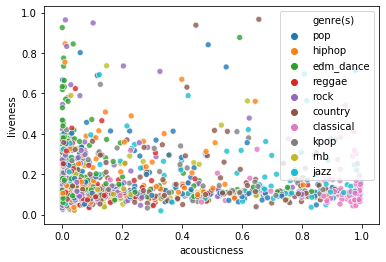

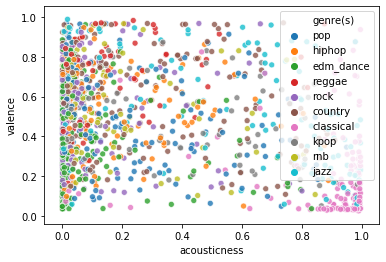

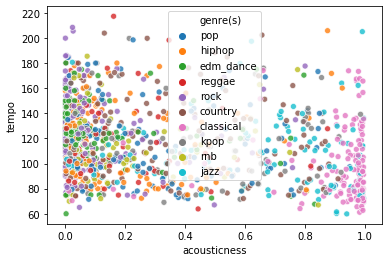

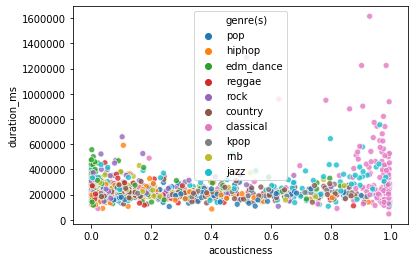

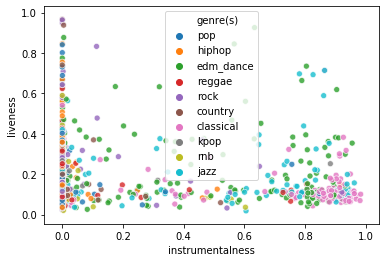

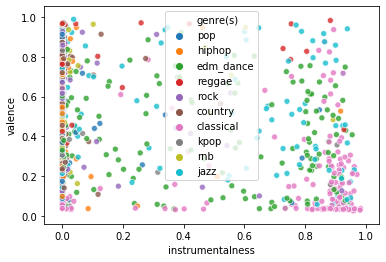

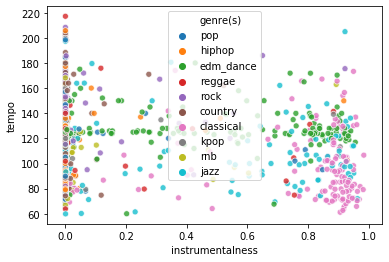

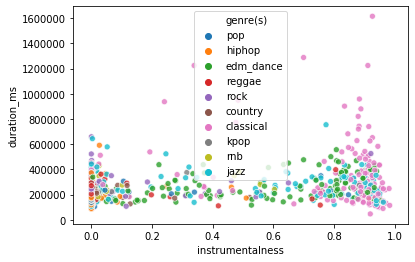

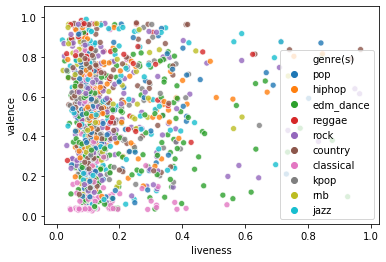

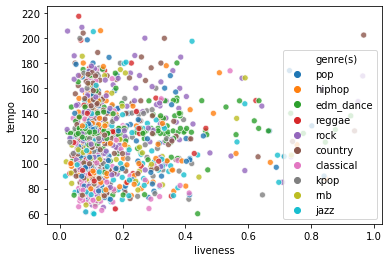

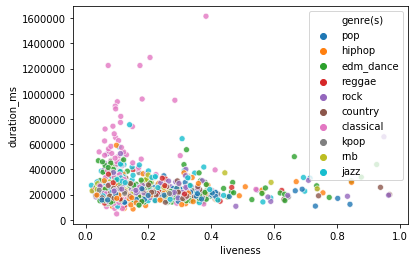

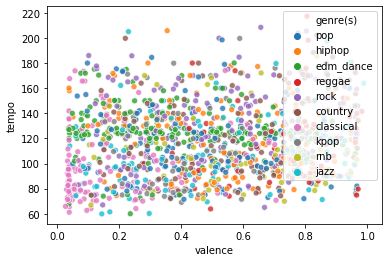

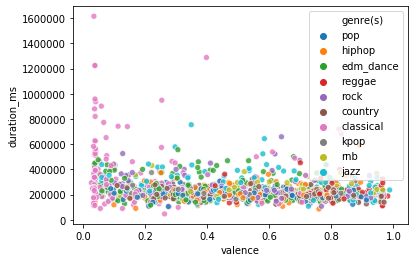

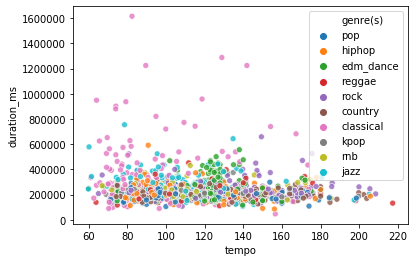

In [51]:
#scatter plots
import seaborn as sns

list_of_pairs = [(numerical_feats[f1], numerical_feats[f2]) for f1 in range(len(numerical_feats)) for f2 in range(f1+1,len(numerical_feats))]
for i in list_of_pairs:
    #analysis_df.plot.scatter(x=i[0], y=i[1], title=i[0] + ' vs ' + i[1],  hue='genre')
    sns.scatterplot(x=i[0], y=i[1], hue='genre(s)', data=analysis_df, alpha=0.8) 
    plt.show()


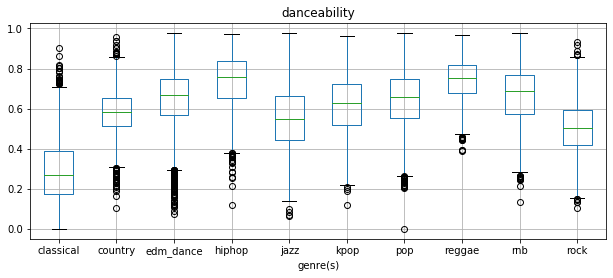

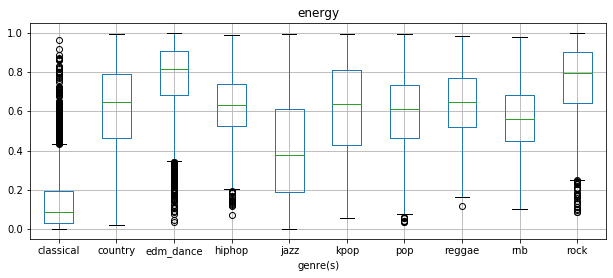

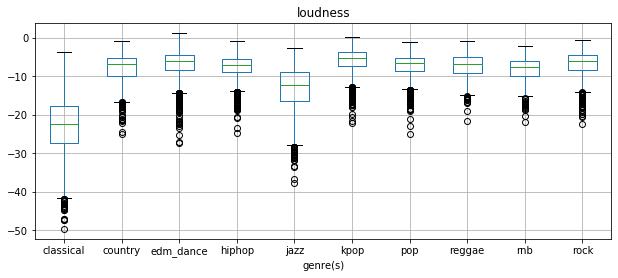

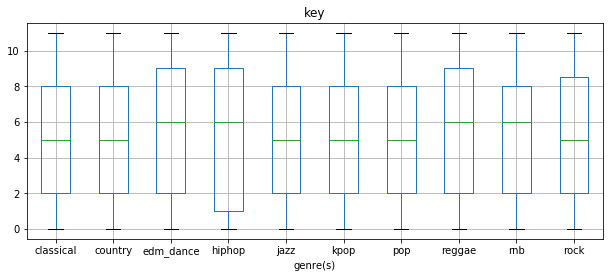

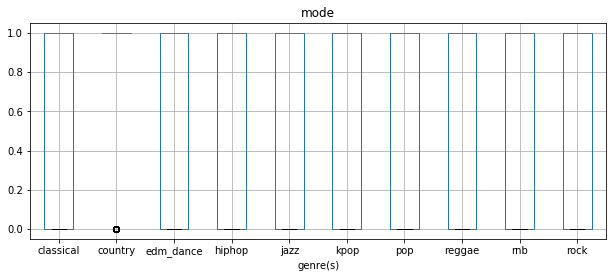

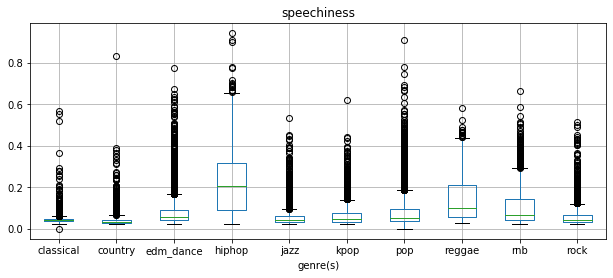

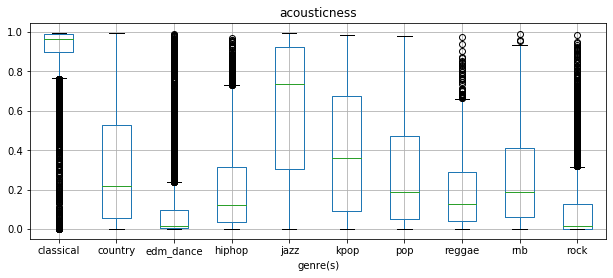

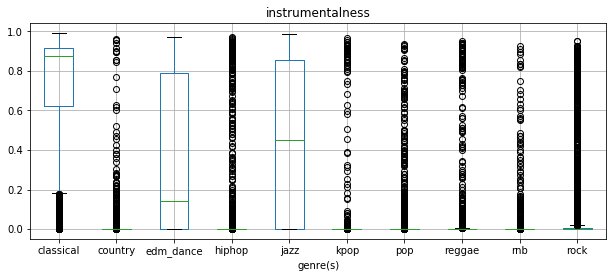

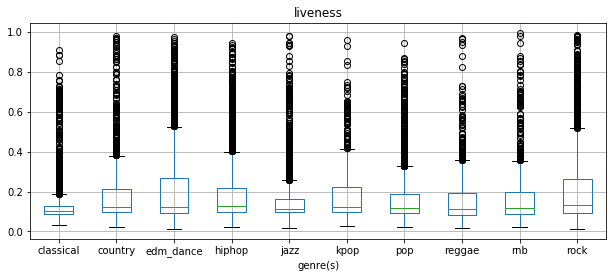

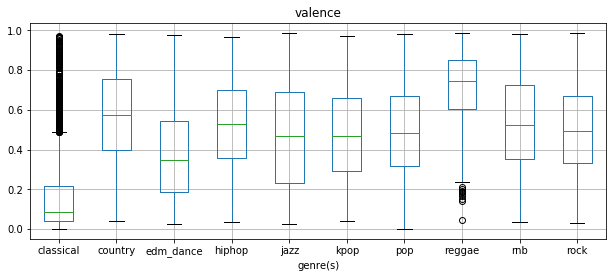

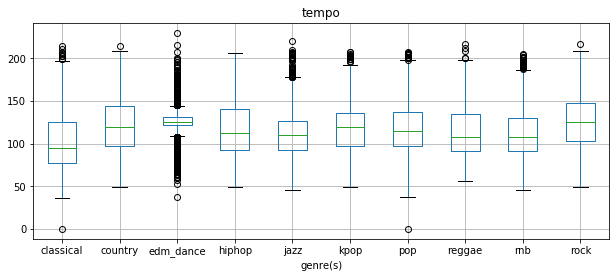

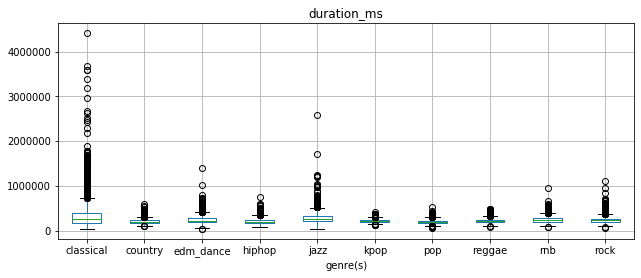

In [82]:
for i in numerical_feats:
    fig, ax = plt.subplots(figsize=(10,4))
    plt.suptitle('')
    analysis_df.boxplot(column=[i], by='genre(s)', ax=ax).get_figure().suptitle('')